In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing dataset into notebook
train_data = pd.read_csv("train_titanic_kaggle.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival	Survival	0 = No, 1 = Yes<br>
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
sex	Sex	<br>
Age	Age in years<br>	
sibsp	# of siblings / spouses aboard the Titanic	<br>
parch	# of parents / children aboard the Titanic	<br>
ticket	Ticket number	<br>
fare	Passenger fare	<br>
cabin	Cabin number	<br>
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>
Variable Notes<br>
pclass: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>
sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>
parch: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can clearly see that there are some missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The datatypes seems fine but there are missing values in 'Age' column and a lot of missing values in 'Cabin' column

DATA PREPROCESSING<br>
1.Check the uniqueness of features('Sex', 'Cabin','Pclass')<br>
2.Check skewness of the 'Age','Fare' feature<br>
3.Drop or impute missing values

In [6]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train_data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [7]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There is only male and female in 'Sex' column and the ratio of gender also seems acceptable

In [8]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

There are 3 classes and their counts too seems acceptable

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

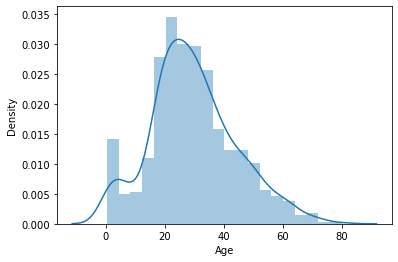

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train_data['Age'])

The feature is almost normally distributed, means there are very less outliers

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

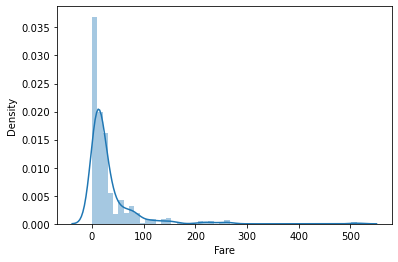

In [15]:
sns.distplot(train_data['Fare'])

The fare column is right skewed, means a lot of abnormal data which is good as first class ticket has to be comparatively a lot expensive than 3rd and 2nd class. Same for 2nd class compared to 3rd class<br>
For it to be normally distributed might have been odd thing

In [16]:
import numpy as np
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are missing values in 'Age' column and a lot of missing values in 'Cabin' column

We create a data pipeline and use ColumnTransformer to reduce model complexity
First we will divide data into numrical and categorical features which will go through different processes into the pipeline

We are going to train our model on following features

In [17]:
num_cols_1 =['Age','Fare']
num_cols_2 =['Pclass', 'SibSp','Parch']
cat_cols = ['Sex']

Create Pipleline for numerical and categorical Features

**For numerical features, I perform the following actions:**

SimpleImputer to fill in the missing values with the mean of that column.

MinMaxScaler to scale the value to range from 0 to 1 (this will affect regression performance).

**For categorical features, I perform the following actions:**

SimpleImputer to fill in the missing values with the most frequency value of that column.

OneHotEncoder to split to many numerical columns for model training. (handle_unknown=’ignore’ is specified to prevent errors when it finds an unseen category in the test set)



In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('min_max_scale',MinMaxScaler())])
num_pipeline_new=Pipeline(steps=[('impute2',SimpleImputer(strategy='most_frequent'))])
cat_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('one_hot',OneHotEncoder(handle_unknown='ignore', sparse=False))])

Create ColumnTransformer to Apply the Pipeline for Each Column Set

ColumnTransformer(transformers=[(‘step name’, transform function,cols), …])

>the column which we have not used in any transformation process should be pass as it is<

remainder='drop'

In [19]:
from sklearn.compose import ColumnTransformer

col_trans=ColumnTransformer(transformers=[('num_pipeline',num_pipeline,num_cols_1),('num_pipeline_new',num_pipeline_new,num_cols_2),('cat_pipeline',cat_pipeline,cat_cols )],
                               remainder='drop',n_jobs=-1 )

Add model to pipeline

In [20]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=42)

clf_pipeline=Pipeline(steps=[('col_trans',col_trans),('model',clf)])

Display the pipeline

In [21]:
from sklearn import set_config
set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', LogisticRegression(random_state=42))])

In [22]:
from sklearn.model_selection import train_test_split

x=train_data[num_cols_1+num_cols_2+cat_cols]
y=train_data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=21, stratify=y )

In [23]:
x.head()

,Age,Fare,Pclass,SibSp,Parch,Sex
0,22.0,7.2500,3,1,0,male
1,38.0,71.2833,1,1,0,female
2,26.0,7.9250,3,0,0,female
3,35.0,53.1000,1,1,0,female
4,35.0,8.0500,3,0,0,male


In [24]:
x_test.head()

,Age,Fare,Pclass,SibSp,Parch,Sex
360,40.0,27.9000,3,1,4,male
858,24.0,19.2583,3,0,3,female
497,NaN,15.1000,3,0,0,male
86,16.0,34.3750,3,1,3,male
583,36.0,40.1250,1,0,0,male


*Pass Data through the Pipeline*

**pipeline_name.fit, pipeline_name.predict, pipeline_name.score**

In [25]:
clf_pipeline.fit(x_train,y_train)
clf_pipeline.score(x_test,y_test)

0.7821229050279329

We got an accuracy score of 77.6%

Save the pipeline

In [28]:
#save the pipeline as pipe.joblib
import joblib
joblib.dump(clf_pipeline,'pipe.joblib')

['pipe.joblib']

In [29]:
#load the pipeline to use whenever needed
joblib.load('pipe.joblib')

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', LogisticRegression(random_state=42))])

In [30]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('min_max_scale',
                                                     MinMaxScaler())]),
                                    ['Age', 'Fare']),
                                   ('num_pipeline_new',
                                    Pipeline(steps=[('impute2',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Pclass', 'SibSp', 'Parch']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one_hot',
                                          

**we can improve our accuracy by hyperparameter tuning and adding functions in pipeline or skipping some steps in it**

In [31]:
# below is tuning parameter
# l1--> Lasso Regression, l2--> Ridge Regression
grid_params={'model__penalty': ['none','l2','l1'],
             'model__C':np.logspace(-4,4,20)               
}

In [33]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(clf_pipeline,grid_params,cv=10,scoring='accuracy')
gs.fit(x_train,y_train)
print("best score of train set:",(gs.best_score_))
print("best params of train set:",(gs.best_params_))
print("best score of test set:",(gs.score(x_test,y_test)))

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn

best score of train set: 0.8075117370892018
best params of train set: {'model__C': 0.23357214690901212, 'model__penalty': 'l2'}
best score of test set: 0.7821229050279329


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver 

After Parameter tuning we got accuracy of 78.21% on test data without lasso or ridge regression

With the pipeline, we can create data transformation steps in the pipeline and perform a grid search to find the best step. A grid search will select which step to skip and compare the result of each case.

I want to know which scaling method will work best for my data between MinMaxScaler and StandardScaler.

In [34]:
from sklearn.preprocessing import StandardScaler

num_pipeline2=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('min_max_scale',MinMaxScaler()),('std_scale',StandardScaler())])
col_trans2=ColumnTransformer(transformers=[('num_pipeline',num_pipeline2,num_cols_1),('num_pipeline_new',num_pipeline_new,num_cols_2),('cat_pipeline',cat_pipeline,cat_cols )],
                               remainder='drop',n_jobs=-1 )
clf_pipeline2=Pipeline(steps=[('col_trans2',col_trans2),('model',clf)])

In [35]:
display(clf_pipeline2)

Pipeline(steps=[('col_trans2',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler()),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', LogisticRegression(random_state=42))])

In [36]:
clf_pipeline2.get_params()

{'memory': None,
 'steps': [('col_trans2', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('min_max_scale',
                                                     MinMaxScaler()),
                                                    ('std_scale',
                                                     StandardScaler())]),
                                    ['Age', 'Fare']),
                                   ('num_pipeline_new',
                                    Pipeline(steps=[('impute2',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Pclass', 'SibSp', 'Parch']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImp

In grid search parameters, specify the steps you want to skip and set their value to passthrough.

Since MinMaxScaler and StandardScaler should not perform at the same time, I will use a list of dictionaries for the grid search parameters.

[{case 1},{case 2}]

In [37]:
#below is list of dictionaries
grid_step_params=[{'col_trans2__num_pipeline__min_max_scale':['passthrough']},{'col_trans2__num_pipeline__std_scale':['passthrough']}]
gs2=GridSearchCV(clf_pipeline2,grid_step_params,cv=5,scoring='accuracy')
gs2.fit(x_train,y_train)
print("best score of train set:",(gs2.best_score_))
print("best params of train set:",(gs2.best_params_))
print("best score of test set:",(gs2.score(x_test,y_test)))

best score of train set: 0.8019600118191667
best params of train set: {'col_trans2__num_pipeline__min_max_scale': 'passthrough'}
best score of test set: 0.7821229050279329


After Parameter tuning we got accuracy of 78.77% on test data with using StandardScaler

The best case is minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.

**You can find the best hyperparameter sets and the best data preparation method by adding tuning parameters to the dictionary of each case of the data preparation method.**

In [38]:
grid_params={'model__penalty': ['none','l2','l1'],
             'model__C':np.logspace(-4,4,20)               
}
grid_step_params2=[{**{'col_trans2__num_pipeline__min_max_scale':['passthrough']},**grid_params},{**{'col_trans2__num_pipeline__std_scale':['passthrough']},**grid_params}]


In [39]:
gs3=GridSearchCV(clf_pipeline2,grid_step_params2, cv=5, scoring='accuracy')
gs3.fit(x_train,y_train)
print("best score of train set:",(gs3.best_score_))
print("best params of train set:",(gs3.best_params_))
print("best score of test set:",(gs3.score(x_test,y_test)))

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn

best score of train set: 0.8075445681079485
best params of train set: {'col_trans2__num_pipeline__std_scale': 'passthrough', 'model__C': 0.08858667904100823, 'model__penalty': 'l2'}
best score of test set: 0.7821229050279329


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver 

After hyperparameter tuning and finding the method which gives most accuracy is StandardScaler method and with 'model__C': 0.23357214690901212, 'model__penalty': 'l2'}
The accuracy is 78.21%

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 15)
clf_pipeline_knn=Pipeline(steps=[('col_trans',col_trans),('model',clf_knn)])


In [41]:
display(clf_pipeline_knn)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', KNeighborsClassifier(n_neighbors=15))])

In [42]:
clf_pipeline_knn.fit(x_train,y_train)
clf_pipeline_knn.score(x_test,y_test)

0.7486033519553073

Has score less than that of LogisticRegressions'

In [43]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf', max_iter=500)
clf_pipeline_svc=Pipeline(steps=[('col_trans',col_trans),('model',clf_svc)])

In [44]:
display(clf_pipeline_svc)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', SVC(max_iter=500))])

In [45]:
clf_pipeline_svc.fit(x_train,y_train)
clf_pipeline_svc.score(x_test,y_test)

0.7821229050279329

Clf_pipeline and clf_pipeline_svc gives same score, 78.21%

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
clf_pipeline_rfc=Pipeline(steps=[('col_trans',col_trans),('model',clf_rf)])

In [47]:
display(clf_pipeline_rfc)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num_pipeline_new',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier(max_depth=5, random_state=1))])

In [48]:
clf_pipeline_rfc.fit(x_train,y_train)
clf_pipeline_rfc.score(x_test,y_test)

0.7821229050279329

In [49]:
clf_pipeline_rfc.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('min_max_scale',
                                                     MinMaxScaler())]),
                                    ['Age', 'Fare']),
                                   ('num_pipeline_new',
                                    Pipeline(steps=[('impute2',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['Pclass', 'SibSp', 'Parch']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one_hot',
                                          

In [50]:
param_grid = { 
    'model__n_estimators': [25, 50, 100, 150], 
    'model__max_features': ['sqrt', 'log2', None], 
    'model__max_depth': [3, 5, 6, 9], 
    'model__max_leaf_nodes': [3, 6, 9, None] 
}

In [51]:
gs4=GridSearchCV(clf_pipeline_rfc,param_grid,cv=5,scoring='accuracy')
gs4.fit(x_train,y_train)
print("best score of train set:",(gs4.best_score_))
print("best params of train set:",(gs4.best_params_))
print("best score of test set:",(gs4.score(x_test,y_test)))

best score of train set: 0.8384812370727864
best params of train set: {'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__max_leaf_nodes': None, 'model__n_estimators': 150}
best score of test set: 0.7877094972067039


Clf_pipeline2 and clf_pipeline_svc gives same score, 78.21%
while clf_pipeline_rfc(RandomForestClassifier's) score is 78.77% which is higher 
so, I will use clf_pipeline_rfc for prediction of test data

In [47]:
#importing test dataset 
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
num_cols =['PassengerId','Pclass','Age','SibSp','Parch','Fare']
cat_cols = ['Sex']
X=test_data[num_cols+cat_cols]


In [49]:
predictions= clf_pipeline_rfc.predict(X)
print(predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
